In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import bqplot as bq
import os

#increasing cell width with Jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to show the raw code."></form>''')

In [3]:
df = file_name='C:\\Users\Konrad\jdszr3-datavirus\Python\code\eda_final.csv'
file_path = os.path.join(os.path.abspath(""), "PYTHON", file_name)

df = pd.read_csv(file_name,delimiter=',')
df = df.drop(columns='Unnamed: 0')

df.describe().round(2)

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69542.00,69542.00,69542.00,69542.00,69542.00,69542.00,69542.00,69542.00,69542.00,69542.00,69542.0,69542.0,69542.00
mean,53.34,1.35,164.44,74.20,127.02,81.69,1.37,1.23,0.09,0.05,0.8,0.5,27.47
std,6.76,0.48,7.86,14.25,17.07,9.84,0.68,0.57,0.28,0.23,0.4,0.5,5.18
min,29.58,1.00,125.00,35.45,70.00,52.00,1.00,1.00,0.00,0.00,0.0,0.0,15.04
25%,48.41,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0,23.88
50%,53.98,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0,26.37
75%,58.43,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0,30.12
max,64.97,2.00,207.00,200.00,240.00,180.00,3.00,3.00,1.00,1.00,1.0,1.0,59.52


### _Application_

In [4]:
style = {'description_width': 'initial'}
#Systolic Blood Pressure - slider
style = {'description_width': 'initial'}
sys_slider = widgets.IntSlider(value = df['systolic'].mean(), 
                               min = df['systolic'].min(), 
                               max = df['systolic'].max(), 
                               step = 1, 
                               style=style, 
                               disabled=False,
                               continuous_update=False,
                               orientation='vertical',
                               readout=True,
                               description='Systolic')

dias_slider = widgets.IntSlider(value = df['diastolic'].mean(), 
                                min = df['diastolic'].min(), 
                                max = df['diastolic'].max(), 
                                step = 1, 
                                style=style, 
                                orientation='vertical',
                                description='Diastolic')

# def adder(sys, dias):
#     print("Selected blood pressure is", sys_slider.value, "/", dias_slider.value)
#     df['systolic'].plot()
    
# sys_dias_interact= interact(adder, sys=sys_slider, dias=dias_slider)
# sys_dias_interact
# pass

#BMI - slider and radio buttons
bmi_slider=widgets.IntSlider(min=15, max=60, step=1)
bmi_radio=widgets.RadioButtons(options=["underweight < 18.5",
                                        "Healthy: 18.5-24.9", 
                                        "Overweight: 25.0-29.9", 
                                        "Obese > 30.0"])

#Gender - radio buttons
gender_radio= widgets.RadioButtons(options=["Female","Male", "None"],
                                   description="Gender")
#Smoke - radio buttons
smoke_choose = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Smoking',
    style=style,
    disabled=False
)

#Cardio disease presence - radio buttons
cardio_choose = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Cardiovascular disease',
    style=style,
    disabled=False
)

#Alcohol drinking - radio buttons
alco_choose = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Alcohol drinking',
    style=style,
    disabled=False
)
#Age - slider and radio buttons
age_slider=widgets.IntSlider(min=25, max=70, step=1)
age_radio=widgets.RadioButtons(options=["30","40","50","60","70"])

#Active - radio buttons
active_choose = widgets.RadioButtons(
    options=['active', 'inactive'],
    style=style,
    description='Sports activity level: ',
    disabled=False
)

#Glucose - dropdown
glucose_choose = widgets.ToggleButtons(
    options=['1 - low', '2 - medium', '3 - high'],
    style=style,
    description='Glucose level: ',
    disabled=False,
    button_style='primary',
    tooltips=['Description of slow', 'Description of regular', 'Description of fast']
)

#Cholesterol - dropdown
cholesterol_choose = widgets.ToggleButtons(
    options=['1 - low', '2 - medium', '3 - high'],
    style=style,
    description='Cholesterol level: ',
    disabled=False,
    button_style='info', 
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
)

#Show button
show_button=widgets.Button(description="Show statistics", button_style='success')

sys_label=widgets.Label(value="")
sys_box=widgets.VBox([sys_label, sys_slider])

dias_label=widgets.Label(value="")
dias_box=widgets.VBox([dias_label, dias_slider])

bmi_label=widgets.Label(value="BMI")
bmi_box=widgets.VBox([bmi_label,bmi_slider, bmi_radio])

age_label=widgets.Label(value="Age")
age_box=widgets.VBox([age_label,age_slider,age_radio])

# 
box0=widgets.Box([sys_box, dias_box])

box1=widgets.Box([bmi_box ,gender_radio,age_box])
box2=widgets.Box([cholesterol_choose])
box3=widgets.Box([glucose_choose])
box4=widgets.Box([smoke_choose])
box5=widgets.Box([alco_choose])
box6=widgets.Box([active_choose])
box7=widgets.Box([cardio_choose])

box21=widgets.VBox([box2, box3, box4, box5, box6, box7])

accordition=widgets.Accordion(children=[box0,box1,box21], labels=('Blood Pressure','Based data','Advanced'))

vbox=widgets.VBox([accordition, show_button])

In [5]:
tab_nest = widgets.Tab()
tab_nest.children = [vbox]
tab_nest.set_title (0,'Blood Pressure')
tab_nest

In [6]:
#function for button to gather data and show plot
def show_stat(bmi, gender, age, smoke):
    print(bmi, gender, age, smoke)


In [7]:
# show_button.on_click(show_stat(bmi_radio.value, gender_radio.value, age_radio.value, smoke_drop.value))


In [8]:
#interakcja ze zwykłym sliderem, definiujesz funkcję
@widgets.interact
def f(x=500):
    print(x)

interactive(children=(IntSlider(value=500, description='x', max=1500, min=-500), Output()), _dom_classes=('wid…

In [9]:
#alternatywnie - w nawiasie możesz podać przedziały
@widgets.interact
def f(x=(df['systolic'].min(),df['systolic'].max())):
    print("Your blood pressure is", x)


interactive(children=(FloatSlider(value=155.0, description='x', max=240.0, min=70.0), Output()), _dom_classes=…

In [10]:
#jak dajesz interact_manual to nie aktualizuje się automatycznie, trzeba kliknąć w przycisk
@widgets.interact_manual(
    color=['black', 'red', 'green'], lw=(1, 10))
#jak dasz kropkę za liczbą to robi się float od razu
def plot(freq=5, color='blue', lw=5, grid=True):
    t = np.linspace(-10., +1., 100000)
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(t, lw=lw, color=color)
    ax.grid(grid)

interactive(children=(IntSlider(value=5, description='freq', max=15, min=-5), Dropdown(description='color', op…

In [11]:
#zwykły slider
freq_slider = widgets.FloatSlider(
    value=2.,
    min=1.,
    max=10.0,
    step=0.1,
    description='Frequency:',
    readout_format='.2f',
)
freq_slider

FloatSlider(value=2.0, description='Frequency:', max=10.0, min=1.0)

In [12]:
#normalny range slider
range_slider = widgets.FloatRangeSlider(
    value=[-1., +1.],
    min=-5., max=+5., step=0.1,
    description='xlim:',
    readout_format='.1f',
)
range_slider

FloatRangeSlider(value=(-1.0, 1.0), description='xlim:', max=5.0, min=-5.0, readout_format='.1f')

In [13]:
grid_button = widgets.ToggleButton(
    value=False,
    description='Kliknij!',
    icon='check'
)
grid_button

ToggleButton(value=False, description='Kliknij!', icon='check')

In [14]:
color_buttons = widgets.ToggleButtons(
    options=['blue', 'red', 'green'],
    description='Color:',
)
color_buttons

ToggleButtons(description='Color:', options=('blue', 'red', 'green'), value='blue')

In [15]:
title_textbox = widgets.Text(
    value='Hello World',
    description='Title:',
)
title_textbox

Text(value='Hello World', description='Title:')

In [16]:
color_picker = widgets.ColorPicker(
    concise=True,
    description='Background color:',
    value='#efefef',
    style=style
)
color_picker

ColorPicker(value='#efefef', concise=True, description='Background color:', style=DescriptionStyle(description…

In [17]:
def plot2(b=None):
    xlim = sys_slider.value
    freq = dias_slider.value
    grid = grid_button.value
    color = color_buttons.value
    title = title_textbox.value
    bgcolor = color_picker.value

    t = plt.hist(df[['systolic','diastolic']], bins=10)
#     f, ax = plt.subplots(2)
#     ax.plot(color=color)
#     ax.grid(grid)

In [18]:
button = widgets.Button(
    description='Plot',
)
button

Button(description='Plot', style=ButtonStyle())

In [19]:
@button.on_click
def plot_on_click(b):
    out.clear_output(wait=True)
    with out:
        plot2()
        plt.show()

In [20]:
from ipywidgets import HBox, VBox

In [21]:
tab1 = VBox(children=[sys_slider,
                      dias_slider
                      ])

tab2 = VBox(children=[HBox(children=[smoke_choose,
                                     cardio_choose,
                                     alco_choose,
                                    active_choose]),
                                     ])

tab3 = VBox(children=[HBox(children=[glucose_choose,
                                    cholesterol_choose]),
                                     ])

In [22]:
out = widgets.Output()
tab = widgets.Tab(children=[tab1, tab2, tab3])
tab.set_title(0, 'Blood pressure')
tab.set_title(1, 'Other features')
tab.set_title(2, 'Glucose and cholesterol')
VBox(children=[tab, button, out])

In [36]:
%matplotlib inline
out1 = widgets.Output()
out2 = widgets.Output()
out3 = widgets.Output()

che = widgets.HBox([dias_slider, sys_slider])

with out1:
    fig1, axes1 = plt.subplots()
    df['diastolic'].hist(ax = axes1)
    plt.show(fig1)
    display(sys_slider)
    display(che)
    
with out2:
    fig2, axes2 = plt.subplots(figsize=(6,4))
    df['systolic'].hist(ax = axes2)
    plt.show(fig2)

with out3:
    @widgets.interact(x=(0, 50, 1))
    def foo(x):
        print(f'Slider says: {x}')
    
tab = widgets.Tab(children = [out1, out2, out3])
tab.set_title(0, 'Diastolic')
tab.set_title(1, 'Systolic')
tab.set_title(2, 'TestTest')
display(tab)


In [24]:
#figsize=(6,4) to standard

In [25]:
accordion = widgets.Accordion(children=[widgets.IntSlider(), widgets.Text()], 
                              titles=('Slider', 'Text'))
accordion

Accordion(children=(IntSlider(value=0), Text(value='')))

In [26]:
def cardio_presence(choose):
    print(f'Did you have cardiovascular disease? {choose}')
     
widgets.interact(cardio_presence, choose=df['cardio'].unique());

interactive(children=(Dropdown(description='choose', options=(0, 1), value=0), Output()), _dom_classes=('widge…

In [27]:
def plot_diastolic():
    plt.hist(df['systolic'])

widgets.interact(plot_diastolic)
pass

interactive(children=(Output(),), _dom_classes=('widget-interact',))

In [28]:
#wyświetlanie listy widgetów
widgets.Textarea(
    '\n'.join([w for w in dir(widgets) if not w.islower()]),
    layout=widgets.Layout(height='100px', width='200px')
)

Textarea(value='Accordion\nAppLayout\nAudio\nBoundedFloatText\nBoundedIntText\nBox\nButton\nButtonStyle\nCallb…

In [29]:
#If more formatting is required, you can use an HTML widget.
html = widgets.HTML(
    value='<b>Bolded texT</b> <font color="green">html</font>', 
    description=''
)
html

HTML(value='<b>Bolded texT</b> <font color="green">html</font>')

In [30]:
#VBox - vertical box container
#HBox - horizontal box container

In [31]:
widgets.HBox([sys_slider, dias_slider])

In [32]:
from ipywidgets import Button, Layout
out = widgets.Output(layout=Layout(width='100%', height='800px', border='solid', grid_area='footer'))
out

Output(layout=Layout(border='solid', grid_area='footer', height='800px', width='100%'))

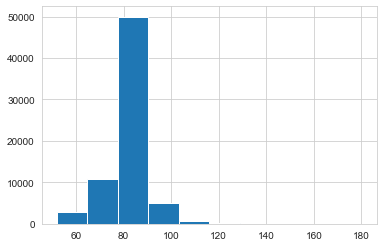

In [33]:
with out:
    plt.hist(df['diastolic'])

In [34]:
@widgets.interact(x=(df['systolic'].min(), df['systolic'].max()))
def f(x=155):
    print(x)

interactive(children=(FloatSlider(value=155.0, description='x', max=240.0, min=70.0), Output()), _dom_classes=…

In [35]:
range_slider = widgets.FloatRangeSlider(
    value=[-1., +1.],
    min=df['diastolic'].min(), 
    max=df['diastolic'].max(), 
    step=0.1,
    description='Diastolic range:',
    readout_format='.0f',
)
range_slider

FloatRangeSlider(value=(52.0, 52.0), description='Diastolic range:', max=180.0, min=52.0, readout_format='.0f'…